Model generatywny opisuje sposób generowania zestawu danych z punktu widzenia modelu probabilistycznego.
Poprzez próbkowanie z tego modelu jesteśmy w stanie wygenerować nowe dane.

In [ ]:
qimport numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential, Model
from keras.layers import Flatten,Dense,Input,Conv2D,BatchNormalization,LeakyReLU,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from keras.layers.preprocessing.image_preprocessing import transform
import matplotlib.pyplot as plt
import keras.backend as K


In [ ]:
# import keras
# keras.__version__
import tensorflow
tensorflow.__version__

'2.7.0'

Uczenie głębokie to klasa algorytmów uczenia maszynowego, która wykorzystuje stos warstw jednostek
przetwarzania w celu nauczenia się wysokopoziomowych reprezentacji na podstawie danych nieustrukturyzowanych.

In [ ]:

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train,NUM_CLASSES)
y_test = to_categorical(y_test,NUM_CLASSES)



In [ ]:
x_train[54,12,13,1]

0.36862746

In [ ]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10,
    kernel_size = (4,4),
    strides = 2,
    padding = 'same'
)(input_layer)

conv_layer_2 = Conv2D(
    filters = 20,
    kernel_size = (3,3),
    strides = 2,
    padding = 'same'
)(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)
output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer,output_layer)

In [ ]:
#model.summary()
#model.get_weights()
#model.save('test')

INFO:tensorflow:Assets written to: test/assets


In [ ]:
input_layer = Input(shape=(32,32,3))

x = Conv2D(filters = 32, kernel_size = 3,strides = 1,padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 32, kernel_size = 3,strides = 2,padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,strides = 1,padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Conv2D(filters = 64, kernel_size = 3,strides = 2,padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)

x = Flatten()(x)

x= Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer,output_layer)


In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                           

In [ ]:

model = Sequential([
                    Dense(200,activation= 'relu', input_shape=(32,32,3)),
                    Flatten(),
                    Dense(150,activation='relu'),
                    Dense(10,activation='softmax'),
])

In [ ]:

input_layer = Input(shape=(32,32,3))

x = Flatten()(input_layer)
x = Dense(units=200,activation='relu')(x)
x = Dense(units=150,activation='relu')(x)

output_layer = Dense(units=10,activation='softmax')(x)
model = Model(input_layer,output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               614600    
                                                                 
 dense_7 (Dense)             (None, 150)               30150     
                                                                 
 dense_8 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [ ]:


opt = Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])


In [ ]:
model.fit(
    x_train,
    y_train,
    batch_size = 32,
    epochs = 10,
    shuffle = True,
    validation_data=(x_test,y_test),
)


Epoch 1/10
1563/1563 [==============================] - 176s 112ms/step - loss: 1.5420 - accuracy: 0.4618 - val_loss: 1.4632 - val_accuracy: 0.5049
Epoch 2/10
1563/1563 [==============================] - 173s 111ms/step - loss: 1.1596 - accuracy: 0.5917 - val_loss: 1.0111 - val_accuracy: 0.6383
Epoch 3/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.0137 - accuracy: 0.6461 - val_loss: 1.0913 - val_accuracy: 0.6223
Epoch 4/10
1563/1563 [==============================] - 173s 111ms/step - loss: 0.9295 - accuracy: 0.6747 - val_loss: 0.8855 - val_accuracy: 0.6922
Epoch 5/10
1563/1563 [==============================] - 173s 111ms/step - loss: 0.8585 - accuracy: 0.6997 - val_loss: 0.8534 - val_accuracy: 0.7075
Epoch 6/10
1563/1563 [==============================] - 174s 111ms/step - loss: 0.8101 - accuracy: 0.7178 - val_loss: 0.8944 - val_accuracy: 0.6870
Epoch 7/10
1563/1563 [==============================] - 173s 110ms/step - loss: 0.7702 - accuracy: 0.7290 - val_

In [ ]:
model.evaluate(x_test,y_test, batch_size=1000)

10/10 [==============================] - 8s 719ms/step - loss: 0.8590 - accuracy: 0.7064


[0.8590060472488403, 0.7063999772071838]

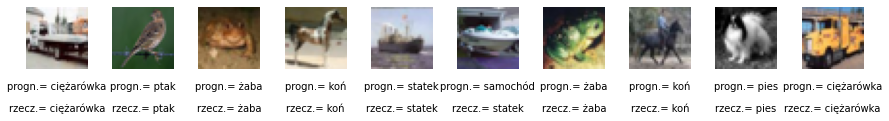

In [ ]:

CLASSES = np.array(['samolot','samochód','ptak','kot','jeleń','pies','żaba','koń','statek','ciężarówka'])
preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds,axis= -1)]
actual_single = CLASSES[np.argmax(y_test,axis= -1)]


n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)
fig = plt.figure(figsize=(15,13))
fig.subplots_adjust(hspace=0.4,wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show,i+1)
    ax.axis('off')
    ax.text(0.5,-0.35,'progn.= '+ str(preds_single[idx]), fontsize = 10, ha='center', transform=ax.transAxes)
    ax.text(0.5,-0.7,'rzecz.= '+ str(actual_single[idx]), fontsize = 10, ha='center', transform=ax.transAxes)
    ax.imshow(img)